In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from metropolis_hastings import MetropolisHastings
from utils import HPD, ESS

<span style="font-size:250%">UK</span>  

In [5]:

# 데이터 읽기
UK = np.loadtxt('seroprevalence_uk.csv', delimiter=',')
age, I, T = UK[:, 0], UK[:, 1], UK[:, 2]

# 메트로폴리스-헤이스팅스 샘플링
mh = MetropolisHastings(age, I, T, n_samples=11000, sigma=0.01)
lambda_samples, acceptance_prob = mh.run()

# Burn-in 제거
lambda_samples = lambda_samples[1000:]

In [6]:

# 효과적인 샘플 크기 (ESS)
ess = ESS(lambda_samples)
print(f"Effective Sample Size (UK): {ess}")


Effective Sample Size (UK): 1604.8847202225734


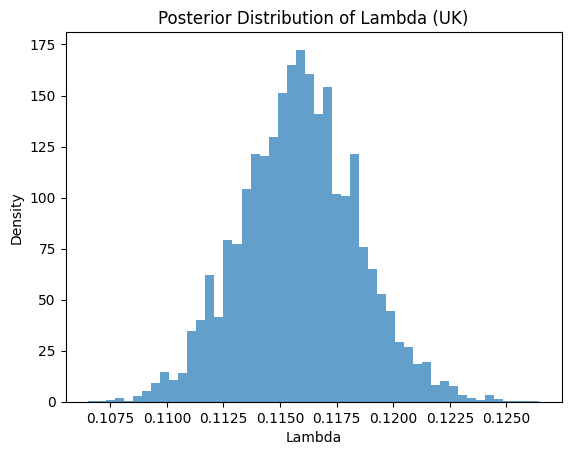

In [7]:

# posterior 분포 히스토그램
plt.hist(lambda_samples, bins=50, density=True, alpha=0.7)
plt.title("Posterior Distribution of Lambda (UK)")
plt.xlabel("Lambda")
plt.ylabel("Density")
plt.show()

In [15]:

# 최대 posterior 확률 추정 (MAP)
lambda_map = np.mean(lambda_samples)
print(f"MAP Estimate (UK): {lambda_map}")

MAP Estimate (UK): 0.11586134457047445


In [16]:


# 신뢰 구간 (HPD) CI
lower, upper = HPD(lambda_samples, 0.95)
print(f"95% Credible Interval (UK): [{lower}, {upper}]")


95% Credible Interval (UK): [0.11073286121233346, 0.12088092243046257]


In [17]:


# R0 및 집단 면역 계산
L = 60
R0 = 1 + L * np.array([lower, upper])
Herd_immunity = 1 - 1 / R0
print(f"R0 Range (UK): {R0}")
print(f"Herd Immunity Threshold (UK): {Herd_immunity}")


R0 Range (UK): [7.64397167 8.25285535]
Herd Immunity Threshold (UK): [0.86917796 0.87882982]


<span style="font-size:250%">China</span>  

In [18]:

CH = np.loadtxt('seroprevalence_china.csv', delimiter=',')
ageC, IC, TC = CH[:, 0], CH[:, 1], CH[:, 2]

mhC = MetropolisHastings(ageC, IC, TC, n_samples=11000, sigma=0.01)
lambda_samplesC, acceptance_probC = mhC.run()

# Burn-in 제거
lambda_samplesC = lambda_samplesC[1000:]


In [19]:

# 효과적인 샘플 크기 (ESS)
essC = ESS(lambda_samplesC)
print(f"Effective Sample Size (China): {essC}")

Effective Sample Size (China): 9294.636545571264


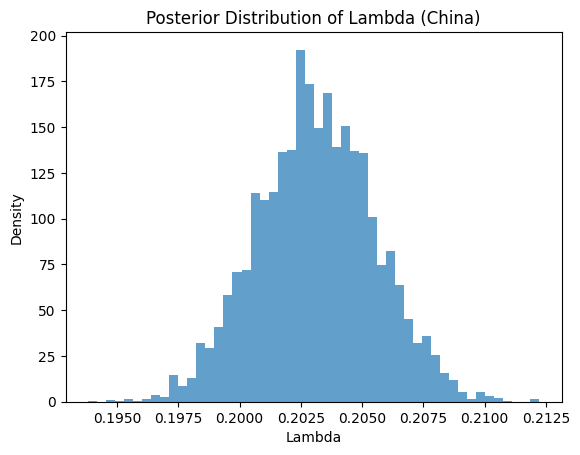

In [20]:


# posterior 분포 히스토그램
plt.hist(lambda_samplesC, bins=50, density=True, alpha=0.7)
plt.title("Posterior Distribution of Lambda (China)")
plt.xlabel("Lambda")
plt.ylabel("Density")
plt.show()

In [21]:


# 최대 posterior확률 추정 (MAP)
lambda_mapC = np.mean(lambda_samplesC)
print(f"MAP Estimate (China): {lambda_mapC}")

MAP Estimate (China): 0.20313515344111527


In [22]:


# 신뢰 구간 (HPD) CI
lowerC, upperC = HPD(lambda_samplesC, 0.95)
print(f"95% Credible Interval (China): [{lowerC}, {upperC}]")


95% Credible Interval (China): [0.198292991562994, 0.207588710391425]


In [23]:

LC = 60
R0C = 1 + LC * np.array([lowerC, upperC])
Herd_immunityC = 1 - 1 / R0C
print(f"R0 Range (China): {R0C}")
print(f"Herd Immunity Threshold (China): {Herd_immunityC}")


R0 Range (China): [12.89757949 13.45532262]
Herd Immunity Threshold (China): [0.92246607 0.92567997]
